In [25]:
import numpy as np
import seaborn as sns
import bokeh
import pandas as pd
import matplotlib.pyplot as plt

             X           Y      Xvel      Yvel
0  1208.557314  965.277858  0.557314 -0.722142
1  1207.867167  966.162022 -0.132833  0.162022
2  1207.309837  963.508693 -0.690163 -0.491307
3  1202.235551  961.275277 -2.764449  1.275277
4  1199.461569  956.000109 -3.538431 -1.999891


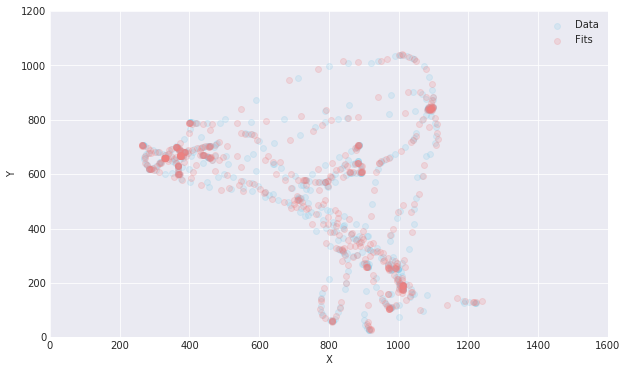

In [48]:
fname = "~/projects/Kalman/data/S10_05_19_2017_train_mouse_subjects._block213"
data = pd.read_csv(fname+'dataToFit_train.csv', names=['X','Y','Xvel','Yvel'])
fit = pd.read_csv(fname+'fitsFromModel_train.csv', names=['X','Y','Xvel','Yvel'])
print(fit.head())
idx = [x for x in range(1000,1500)]
x1 = data.iloc[idx,0:2]
x1_fit = fit.iloc[idx,0:2]
y1 = data.iloc[idx,1]
y1_fit = fit.iloc[idx,1]

fig = plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.regplot('X','Y',data=x1, color="skyblue", fit_reg=False, scatter_kws={'alpha':0.2} ,label="Data")
reg_plot = sns.regplot('X','Y',data=x1_fit, color="lightcoral", fit_reg=False, scatter_kws={'alpha':0.2}, label="Fits")
reg_plot.set(xlim=(0,1600))
reg_plot.set(ylim=(0,1200))
plt.legend(['Data','Fits'], ncol=1, loc='upper right');
#fig.legend(labels=['Data','Fits'])
plt.show()

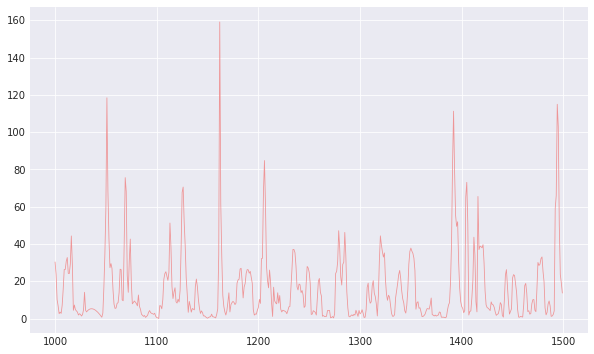

In [49]:
diff_fit = (x1_fit-x1)**2
sse = diff_fit.iloc[:,0]+diff_fit.iloc[:,1]
fig = plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

#sns.pointplot(x=idx,y=diff_fit.iloc[:,0], markers='.', size=0.02)
plt.plot(idx,np.sqrt(sse), color='lightcoral', alpha=0.8, linewidth=0.8)
plt.show()

   0.000000000000000000e+00  0.000000000000000000e+00.1
0                       0.0                    0.000000
1                       0.0                    0.000000
2                       0.0                    0.303155
3                       0.0                    0.000000
4                       0.0                    0.000000


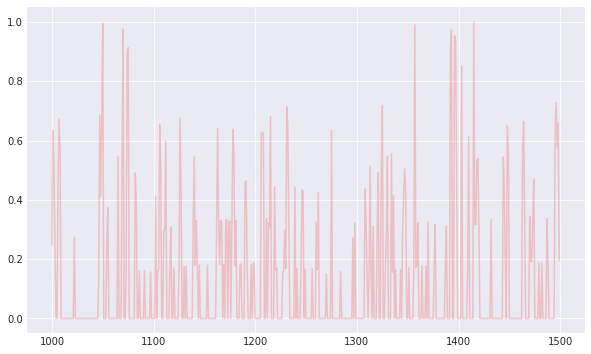

In [50]:
evidence = pd.read_csv(fname+'evidenceFromModel_train.csv')

print(evidence.head())
p1 = plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.plot(idx, evidence.iloc[idx,1], color='lightcoral', alpha=0.4)
#p2.line([idx2,idx2],[evidence.iloc[idx2,0], evidence.iloc[idx2,1]], color=[color2,color2], alpha=[0.4,0.4])
plt.show()

In [ ]:
output_notebook()
p = figure(title="Model predictions v/s data - differences in X")
p.line(range(data.shape[0]), data.iloc[:-1,0]-fit.iloc[1:,0], alpha=0.3)
p1 = figure(title="Model predictions v/s data - differences in Y")
p1.line(range(data.shape[0]), data.iloc[:,1]-fit.iloc[:,1], alpha=0.3)
p2 = figure(title="Model predictions v/s data - differences in Xvel")
p2.line(range(data.shape[0]), data.iloc[:,2]-fit.iloc[:,2], alpha=0.3)

show(column(p,p1,p2))


In [ ]:
No acceleration, zero velocity, transitions

if second derivate gets better